In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [3]:
modelo = tf.keras.models.load_model("my_model.h5")

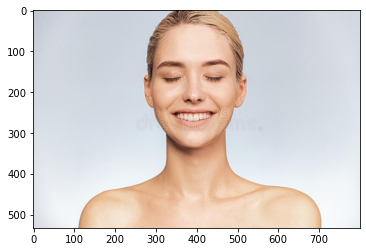

In [4]:
imagen = cv2.imread("/Users/camila/Downloads/ojos_cerrados.jpeg")
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))

In [5]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [6]:
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
eyes= eye_cascade.detectMultiScale(gray,1.1,4)

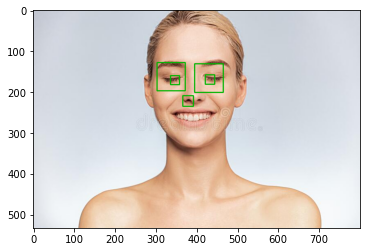

In [7]:
for (x,y,w,h) in eyes:
  cv2.rectangle(imagen, (x,y), (x+w, y+h), (0, 180, 0), 2)

plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))

In [8]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
eyes= eye_cascade.detectMultiScale(gray,1.1,4)

for (x,y,w,h) in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = imagen[y:y+h, x:x+w]
  eyess= eye_cascade.detectMultiScale(roi_gray)
  if len(eyess)==0:
      print("Eyes are not detected")
  else:
      for (ex,ey,ew,eh) in eyess:
        eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

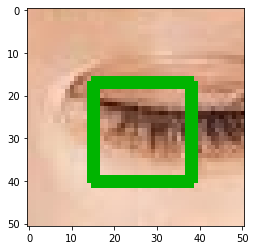

In [9]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [10]:
final_image = cv2.resize(eyes_roi, (180,180))
final_image = np.expand_dims(final_image, axis =0)
final_image.shape

(1, 180, 180, 3)

In [11]:
modelo.predict(final_image)

ValueError: in user code:

    /Users/camila/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /Users/camila/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/camila/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/camila/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/camila/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/camila/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /Users/camila/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /Users/camila/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/camila/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py:266 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 224, 224, 3), found shape=(None, 180, 180, 3)


In [ ]:
path ="/Users/camila/Downloads/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(1)
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open webcam")

while True:
  ret,frame = cap.read()
  eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  eyes= eye_cascade.detectMultiScale(gray, 1.1,4)
  for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
    eyess= eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
      print("Eyes are not detected")
    else:
      for (ex,ey,ew,eh) in eyess:
        eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

  final_image = cv2.resize(eyes_roi, (224,224))
  final_image = np.expand_dims(final_image, axis =0)
  final_image = final_image/255.0

  Predictions = modelo.predict(final_image)
  if (Predictions>1):
    status = "Open Eyes"
  else:
    status = "Closed Eyes"
  
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  print(faceCascade.empty())
  faces = faceCascade.detectMultiScale(gray,1.1,4)

  for (x,y,w,h) in faces:
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)

  font = cv2.FONT_HERSHEY_SIMPLEX

  cv2.putText(frame, status, (50, 50), font, 3, (0,0,255), 2, cv2.LINE_4)
  cv2.imshow("Drowsiness Detection Tutorial", frame)

  if cv2.waitKey(2) & 0xFF == ord('q'):
    break